# Core Mission

## 다음 질문에 답하시오.

### 1. 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.

In [1]:
## 라이브러리 불러오기 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# 데이터 살펴보기

char_df = pd.read_csv('./charcters_stats.csv')
char_df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [3]:
# Total Column에서 max값

char_df['Total'].max()

581

In [4]:
# Total Column에서 max값의 index를 찾아서 이름 구하기

char_df.iloc[char_df['Total'].idxmax(axis=0, skipna=True)]['Name']

'Martian Manhunter'

$\rightarrow$ 수치의 합이 가장 큰 캐릭터는 : **Martian Manhunter**

----

### 2.좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

In [20]:
# 좋고 착함의 기준 col -> Alignment 칼럼 살펴보기

char_df['Alignment'].unique()

array(['good', 'bad', nan, 'neutral'], dtype=object)

In [26]:
# 결측치(NaN)와 중립(Neutral)이 들어가 있는 행 제거  -> 좋은 캐릭터와 나쁜 캐릭터만 남기기
# drop으로 캐릭터 이름(name)과 총합(total) 열 제거

char_df2 = char_df.loc[(char_df['Alignment'].isnull() == False) & (char_df['Alignment'] != 'neutral')].drop(['Name','Total'],axis=1)
char_df2['Alignment'].unique()

array(['good', 'bad'], dtype=object)

In [28]:
char_df2

,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat
0,good,50,31,43,32,25,52
1,good,38,100,17,80,17,64
2,good,88,14,35,42,35,85
3,good,50,90,53,64,84,65
4,bad,63,80,53,90,55,95
...,...,...,...,...,...,...,...
606,good,88,10,12,28,12,14
607,good,50,10,35,28,31,28
608,good,50,100,27,100,83,28
609,good,75,10,23,28,100,56


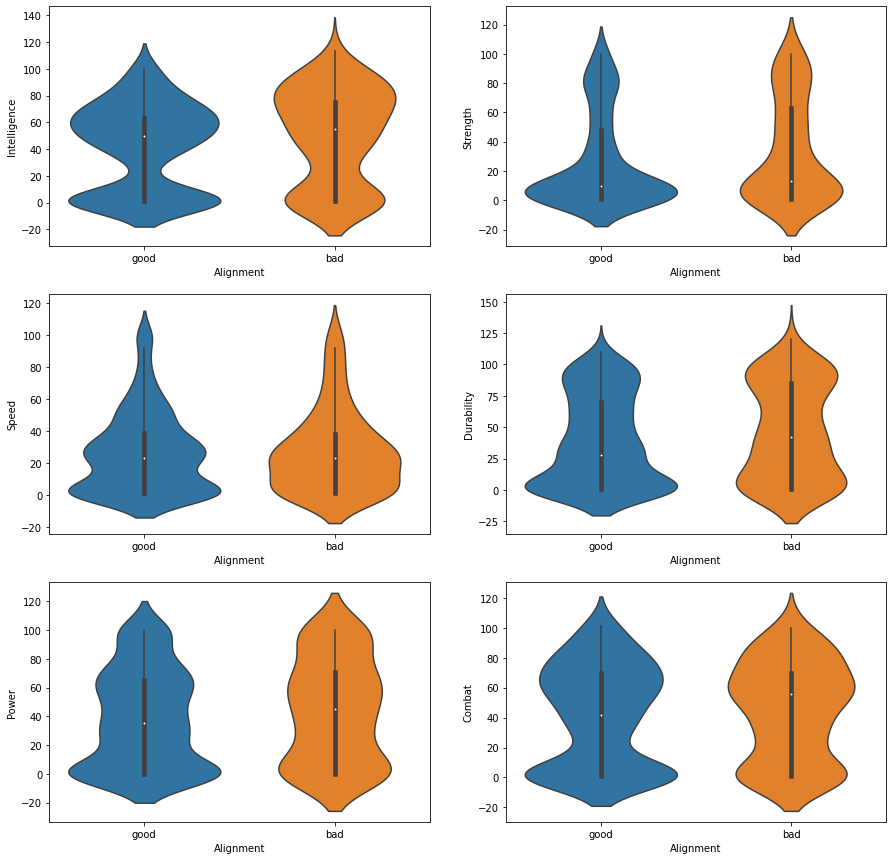

In [39]:
fig = plt.figure(figsize=(15,15))

for i, key in enumerate(char_df2.columns):
    if i < 1 :
        continue
    
    fig.add_subplot(3,2,i)
    sns.violinplot(x='Alignment', y=key, data=char_df2)

plt.show()